In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('D:\Sohaib Documents\Python\Machine Learning\Project\spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning 

In [4]:
# Removing unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [6]:
df.shape

(5572, 2)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5169, 2)

In [9]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df.target=le.fit_transform(df['target'])

In [13]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

In [14]:
# df.groupby('target')['target'].count()
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x2146a6457f0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6')])

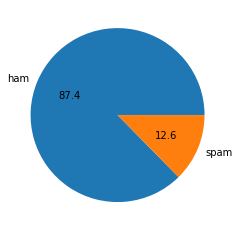

In [15]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.1f')

In [16]:
df['num_characters']=df.sms.apply(len)

In [17]:
#! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [21]:
#!pip install --upgrade pip

In [22]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Sohaib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_word']=df.sms.apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
# Or we can do
#for i in df.sms:
#    a=nltk.word_tokenize(i)
#   print(len(a))

In [25]:
df['num_sentences']=df.sms.apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,sms,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# Write description for all three columns num_char,num_word and num_sent for ham mesaages
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Write description for all three columns num_char,num_word and num_sent for spam mesaages
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_word', ylabel='Count'>

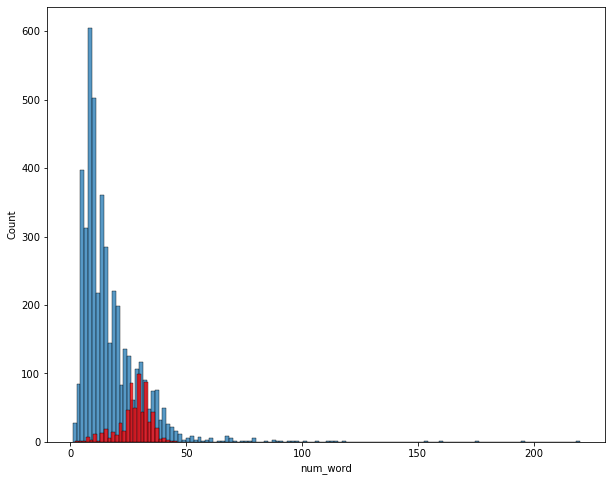

In [29]:
# Plot histogram of ham VS num_char + spam VS num_char and check deviation
plt.figure(figsize=(10,8))
sns.histplot(df[df.target==0]['num_word'])
sns.histplot(df[df.target==1]['num_word'],color='red')

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

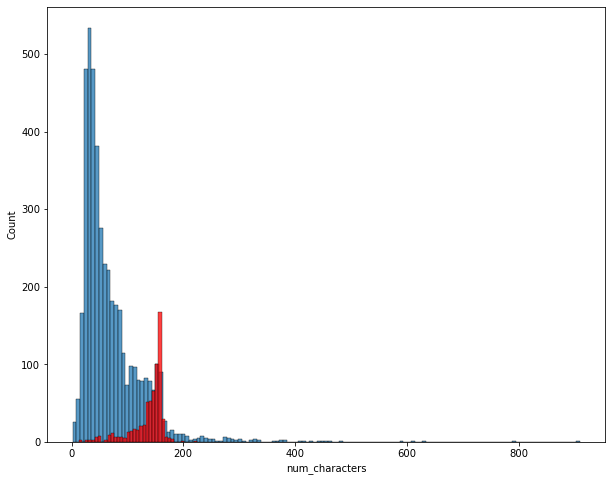

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(df[df.target==0]['num_characters'])
sns.histplot(df[df.target==1]['num_characters'],color='red')

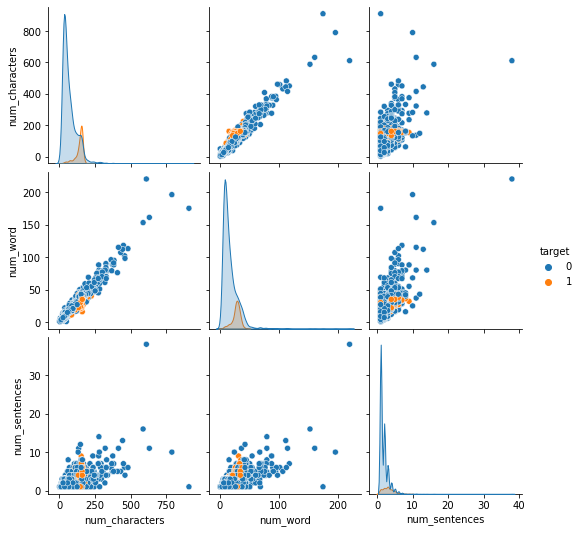

In [31]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

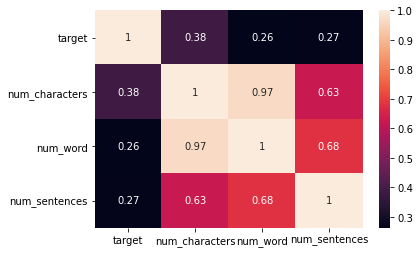

In [32]:
# checking correlations using heat map with annotation=Ture
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing 
 1.Lower Case
 2.Tokenization
 3.Removing Special Characters
 4.Removing Stop Words and Punctuation
 5.Stemming

In [33]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:] # It is called clonig
    y.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'): 
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('English')[:5]

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Sohaib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Dancing')

'danc'

In [37]:
df['transform_text']=df.sms.apply(transform_text)
df.head()

,target,sms,num_characters,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [39]:
from wordcloud import WordCloud

In [40]:
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [41]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))

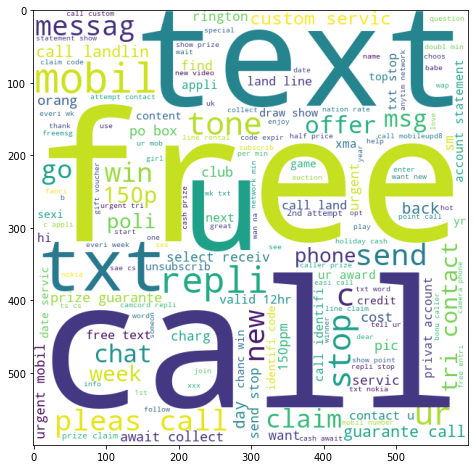

In [42]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

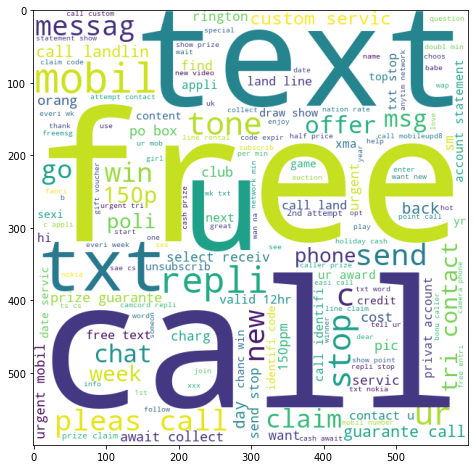

In [43]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [44]:
# finding top 30 most repeated words
ham_corpus=[]
for msg in df[df['target']==0]['transform_text']:
    for word in msg.split(' '):
        ham_corpus.append(word)
        

In [45]:
from collections import Counter
hp=pd.DataFrame(Counter(ham_corpus).most_common(30))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'love'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

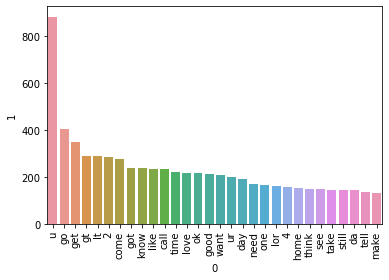

In [46]:
sns.barplot(hp[0],hp[1])
plt.xticks(rotation=90)

In [47]:
# finding top 30 most repeated words
spam_corpus=[]
for msg in df[df['target']==1]['transform_text']:
    for word in msg.split(' '):
        spam_corpus.append(word)

In [48]:
sp=pd.DataFrame(Counter(spam_corpus).most_common(30))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

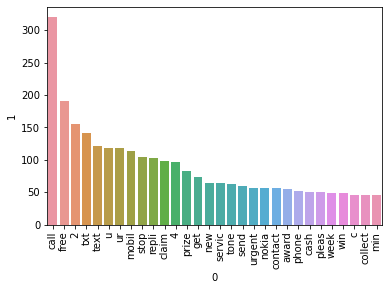

In [49]:
sns.barplot(sp[0],sp[1])
plt.xticks(rotation=90)

# Model Building

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [51]:
x=cv.fit_transform(df['transform_text']).toarray()
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,6698,6699,6700,6701,6702,6703,6704,6705,6706,6707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y=df.target
y.shape

(5169,)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [56]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.867504835589942
0.4759825327510917


In [57]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.9738878143133463
0.8721804511278195


In [90]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9613152804642167
0.9387755102040817


In [55]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [56]:
# lg=LogisticRegression()
# svc=SVC()
# mnb=MultinomialNB()
# knn=KNeighborsClassifier()
# dtc=DecisionTreeClassifier()
# rfc=RandomForestClassifier()
# abc=AdaBoostClassifier()
# bag=BaggingClassifier()
# etc=ExtraTreesClassifier()
# gbc=GradientBoostingClassifier()

In [57]:
# clf={
#     'LGR':lg,
#     'SVC':svc,
#     'MNB':mnb,
#     'KNN':knn,
#     'DTC':dtc,
#     'RFC':rfc,
#     'ABC':abc,
#     'BAG':bag,
#     'ETC':etc,
#     'GBC':gbc
# }

In [58]:
# def model_selection(clf):
#     Accuracy=[]
#     Precision=[]
#     Algorithm=[]
#     for name,clf in clf.items():
#         clf.fit(X_train,y_train)
#         y_pred=clf.predict(X_test)
#         Accuracy.append(accuracy_score(y_test,y_pred))
#         Precision.append(precision_score(y_test,y_pred))
#         Algorithm.append(name)
#     return pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Precision':Precision})

In [59]:
# a=model_selection(clf)

In [60]:
#b=a.sort_values(ascending=False)

In [61]:
# Now we will apply some changes in TFIDFVectorizer like max_feature=3000
# We will scale our data by StandardScaler and then check
# we will apply these changes to get more better precision and accuracy

In [62]:
# # Save model
# import pickle
# # pickle.dump(mnb,open('model.mnb','wb')
# pickle.dump(cv,open('vectorizer.mnb','wb'))

In [ ]:
# import pickle
# import streamlit as st
# import string

# def transform_text(text):
#     text=text.lower()
#     text=nltk.word_tokenize(text)
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text=y[:] # It is called clonig
#     y.clear()
#     for i in text:
#         if i not in string.punctuation and i not in stopwords.words('english'): 
#             y.append(i)
#     text=y[:]
#     y.clear()
#     for i in text:
#         y.append(ps.stem(i))
#     return " ".join(y)

# mnb=pickle.load(open('vectorizer.mnb','rb'))
# model=pickle.load(open('model.mnb','rb'))
# st.title('Email/SMS Spam Classifier')
# input_text=st.text_input('Enter the message')
# transform_sms=transform_text(input_text)
# vector_input=mnb.transform([transform_sms])
# result=model.predict(vector_input)[0]
# if result==1:
#     st.header('Spam')
# else:
#     st.header('Not Spam')

In [2]:
# import pickle

# mnb=pickle.load(open('vectorizer.mnb','rb'))
# model=pickle.load(open('model.mnb','rb'))

In [81]:
input_text=input('Enter the message: ')
transform_sms=transform_text(input_text)
vector_input=cv.transform([transform_sms]).toarray()
mnb.fit(X_train,y_train)
result=mnb.predict(vector_input)[0]
if result==1:
    print('Spam')
else:
    print('Not Spam')

Enter the message:  Your package is pending:Sohaib, we came across a package from January pending for you.
Not Spam
